In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

from sklearn.cross_validation import KFold

%matplotlib inline
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [3]:
df = pd.read_csv('HR_comma_sep.csv')

#Convert salary scale to numbers (1,2,3). 
df.replace(to_replace='low', value=1, inplace=True)
df.replace(to_replace='medium', value=2, inplace=True)
df.replace(to_replace='high', value=3, inplace=True)

y = df['left'] #classes: left or stayed. 

df.drop('left', 1, inplace=True) #get rid of left column bc this is not an independent var. 
df.drop('sales', 1, inplace=True) #get rid of sales column. 

#to numpy arrays
X = np.asarray(df) 
y = np.asarray(y)

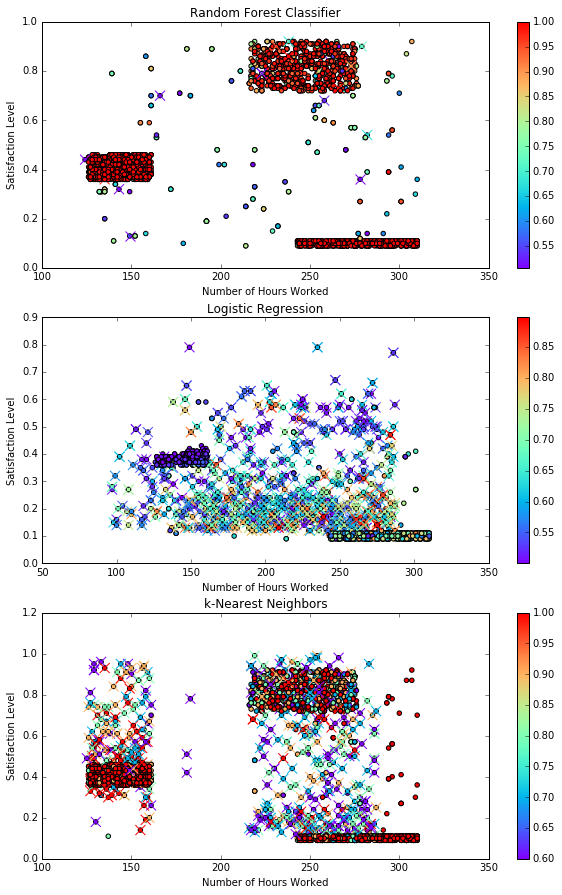

In [4]:
#All used to store the relevant measures. 
RFCFeatureImportances = []
RFCScores = []

LogRegFeatureImportances = []
LogRegScores = []

kNNScores = []

k_folds = 10
kf = KFold(n=len(X), n_folds=k_folds, shuffle=True) # 10-fold CV. 

fig, (axRFC, axLogReg, axkNN) = plt.subplots(nrows=3, figsize=(10,15))

for train, test in kf: 
    
    #Random Forest Classifier
    RFC = RandomForestClassifier(n_estimators=100, max_depth=15)
    RFC.fit(X[train], y[train])
    RFCScores.append(RFC.score(X[test], y[test]))
    RFCFeatureImportances.append(RFC.feature_importances_) 
    RFCProbs = (RFC.predict_proba(X[test]))
    
    #Logistic Regression 
    LogReg = LogisticRegression()
    LogReg.fit(X[train], y[train])
    LogRegScores.append(LogReg.score(X[test], y[test]))
    LogRegFeatureImportances.append(LogReg.coef_)
    LogRegProbs = (LogReg.predict_proba(X[test])) 
    
    #K-Nearest Neighbors
    kNN = KNeighborsClassifier(n_neighbors=10)
    kNN.fit(X[train], y[train])
    kNNScores.append(kNN.score(X[test], y[test])) 
    kNNProbs = (kNN.predict_proba(X[test])) 
    
    #satisfaction levels and number of hours worked. 
    satis = X[test,0]
    hours = X[test,3]
    
    #Get indices of the employees that have high prob of leaving.
    idxkNN = np.where(kNNProbs[:,1] > 0.5)[0]
    idxLogReg = np.where(LogRegProbs[:,1] > 0.5)[0]
    idxRFC = np.where(RFCProbs[:,1] > 0.5)[0]
    
    #Get indices of employees that are predicted to be leaving but are actually staying.
    idxRFCWrong = np.where(y[test][idxRFC] == 0)[0]
    idxLogRegWrong = np.where(y[test][idxLogReg] == 0)[0]
    idxkNNWrong = np.where(y[test][idxkNN] == 0)[0]
    
    imRFC = axRFC.scatter(hours[idxRFC], satis[idxRFC], c=RFCProbs[idxRFC,1], cmap=cm.rainbow)
    axRFC.scatter(hours[idxRFC][idxRFCWrong], satis[idxRFC][idxRFCWrong], marker = 'x', s=100, c=RFCProbs[idxRFC][idxRFCWrong,1], cmap=cm.rainbow)

    imLogReg = axLogReg.scatter(hours[idxLogReg], satis[idxLogReg], c=LogRegProbs[idxLogReg,1], cmap=cm.rainbow)
    axLogReg.scatter(hours[idxLogReg][idxLogRegWrong], satis[idxLogReg][idxLogRegWrong], marker = 'x', s=100, c=LogRegProbs[idxLogReg][idxLogRegWrong,1], cmap=cm.rainbow)
    
    imkNN = axkNN.scatter(hours[idxkNN], satis[idxkNN], c=kNNProbs[idxkNN,1], cmap=cm.rainbow)
    axkNN.scatter(hours[idxkNN][idxkNNWrong], satis[idxkNN][idxkNNWrong], marker = 'x', s=100, c=kNNProbs[idxkNN][idxkNNWrong,1], cmap=cm.rainbow)
    
    #Now we know the top performers, who are likely to leave. 

fig.colorbar(imRFC, ax=axRFC)
fig.colorbar(imLogReg, ax=axLogReg)
fig.colorbar(imkNN, ax=axkNN)

axRFC.set_title('Random Forest Classifier')
axLogReg.set_title('Logistic Regression')
axkNN.set_title('k-Nearest Neighbors')

axRFC.set_ylabel('Satisfaction Level')
axLogReg.set_ylabel('Satisfaction Level')
axkNN.set_ylabel('Satisfaction Level')

axRFC.set_xlabel('Number of Hours Worked')
axLogReg.set_xlabel('Number of Hours Worked') 
axkNN.set_xlabel('Number of Hours Worked') 

plt.show() 

In [14]:
extent = axRFC.get_window_extent().transformed(fig.dpi_scale_trans.inverted())
fig.savefig('axRFC_figure.png', bbox_inches=extent.expanded(1.3,1.25))

extent = axLogReg.get_window_extent().transformed(fig.dpi_scale_trans.inverted())
fig.savefig('axLogReg_figure.png', bbox_inches=extent.expanded(1.3,1.25))

extent = axkNN.get_window_extent().transformed(fig.dpi_scale_trans.inverted())
fig.savefig('axkNN_figure.png', bbox_inches=extent.expanded(1.3,1.25))

kNNScore = np.average(kNNScores)
LogRegScore = np.average(LogRegScores)
RFCScore = np.average(RFCScores)

print(kNNScore, LogRegScore, RFCScore)

0.946529730932 0.79258576829 0.989399288414


In [ ]:
#10 fold cross val on each: logistic regression, random forest classifier, kNN
#show the probabilities of employees leaving


In [3]:
a = [[2,11,34,5,37,56,81,42],[1,5,2,5,7,4,6,4]]
a = np.asarray(a)

print(a)
x = (np.concatenate(a))
np.min(a,axis=1)

[[ 2 11 34  5 37 56 81 42]
 [ 1  5  2  5  7  4  6  4]]


array([2, 1])

In [8]:
idx = [2,5,6]
x[idx][[0,1]]

array([34, 56])

In [ ]:
k = [6,2]
a[[0]*2,k]